In [112]:
import pandas as pd
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [259]:
def plot_performance(y_true, y_pred, title_metric=metrics.mean_squared_error):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.violinplot(data=pd.DataFrame({'actual': y_true, 'predicted': y_pred}), x='actual', y='predicted', ax=ax1)
    
    # confusion matrix
    label_vals = np.sort(y_true.unique())
    cm = metrics.confusion_matrix(y_true, np.round(y_pred), labels=label_vals)
    sns.heatmap(cm, xticklabels=label_vals, yticklabels=label_vals, ax=ax2)
    ax2.set_xlabel('predicted')
    ax2.set_ylabel('actual')
    ax2.invert_yaxis()
    
    score = title_metric(y_true, y_pred)
    _ = fig.suptitle(f'score (default mse): {score}')

In [260]:
labels_df = pd.read_csv(join("data", "cis-pd", "data_labels", "CIS-PD_Training_Data_IDs_Labels.csv"), index_col=0)
features_df = pd.read_csv(join("data", "train_features20200421.csv"), index_col=0)
features_df.index = features_df.index.rename("measurement_id")

In [261]:
df = features_df.join(labels_df)
df.head()

,num_zero_flat,num_zero_nonflat,num_one,num_two,num_three,subject_id,on_off,dyskinesia,tremor
measurement_id,,,,,,,,,
f5871446-90f6-416d-ab41-3fe178b200b9,31676,20993,2858,1704,1255,1023,4.0,1.0,0.0
26b062b0-f4a6-459c-a98b-fc4fb8aa7d49,3484,46004,3870,3518,2983,1020,0.0,NaN,1.0
fea345ae-b6c2-4b9b-a0f4-dc09207a2e4e,12772,30590,4844,5334,6493,1020,0.0,NaN,1.0
af1e9463-68fe-4a04-b76e-9ff3645dd496,3946,40216,4845,5177,5543,1038,0.0,0.0,2.0
23d46fe9-848a-4547-ab2a-f17f88647c56,214,34461,9730,8347,7275,1046,NaN,NaN,1.0


In [262]:
tremor_df = df.loc[pd.notnull(df["tremor"])].copy()
tremor_df["tremor"] = tremor_df["tremor"].astype(int)
X = tremor_df[["num_zero_flat", "num_zero_nonflat", "num_one", "num_two", "num_three"]].values
y = tremor_df["tremor"].values

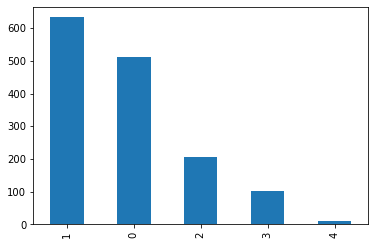

In [263]:
tremor_df["tremor"].value_counts().plot(kind='bar')

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)

In [269]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
y_pred = clf.predict(X_test)

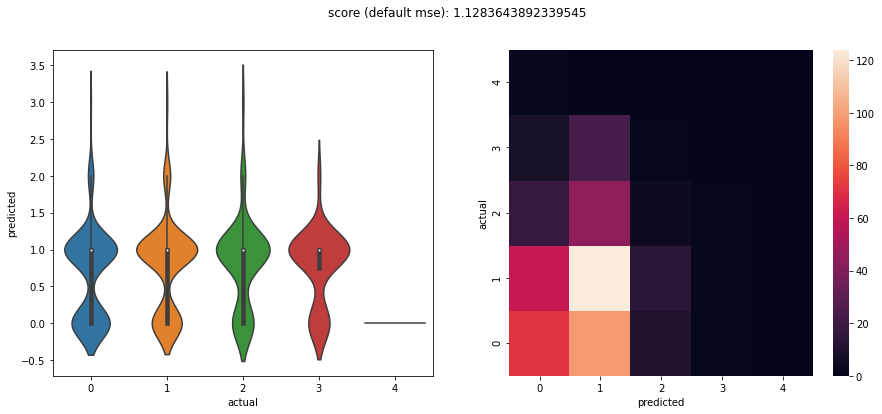

In [271]:
plot_performance(pd.Series(y_test), y_pred)